# Import libraries

In [1]:
#Import required packages
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# DATA COLLECTION

In [2]:
DZdatacsv = pd.read_csv (r'../input/dzchatbot/DZMedicaldata.csv')
DZdatacsv.columns =['ID','Question', 'Answer']

In [3]:
DZdatacsv.head(5)

,ID,Question,Answer
0,2,وش هوما المأكولات لي يديرو الاسهال؟,الحليب و مشتقات الحليب
1,3,وش هوما المأكولات لي يديرو الصداع؟,القهوة . مشتقات الهيستامين\r\n
2,4,وشنهي هو فقر الدم؟,نقص كريات الدم الحمراء او الحديد\r\n
3,5,كيفاش تفيدني أشعة الشمس؟,فيتامين د\r\n
4,6,شحال الوزن الطبيعي نتاع انسان بالغ؟,مؤشر الكتلة الطبيعية بين ثمانية واحد و خمسة اثنين


In [4]:
DZdatacsv = DZdatacsv.set_index('ID')

In [5]:
DZdatacsv.head(5)

,Question,Answer
ID,,
2,وش هوما المأكولات لي يديرو الاسهال؟,الحليب و مشتقات الحليب
3,وش هوما المأكولات لي يديرو الصداع؟,القهوة . مشتقات الهيستامين\r\n
4,وشنهي هو فقر الدم؟,نقص كريات الدم الحمراء او الحديد\r\n
5,كيفاش تفيدني أشعة الشمس؟,فيتامين د\r\n
6,شحال الوزن الطبيعي نتاع انسان بالغ؟,مؤشر الكتلة الطبيعية بين ثمانية واحد و خمسة اثنين


In [6]:
DZdatacsv.shape

(2150, 2)

# DATA Analysis

In [7]:
import re
def get_all_words_with_frequency(corpus):

  input_tokens = set()
  for line in corpus:
    for token in re.findall(r"[\w']+|[^\s\w]", line):
      if token not in input_tokens:
        input_tokens.add(token)
  return len(input_tokens)

In [8]:
def MaxWordsSentence(corpus):
    maxsentence = ""
    maxwords = 0
    for sentence in corpus:
        if len(sentence.split(' ')) > maxwords:
            maxwords = len(sentence.split(' '))
            maxsentence = sentence
    return maxsentence,maxwords

In [9]:
def MaxChartsSentence(corpus):
    maxsentence = ""
    maxwords = 0
    for sentence in corpus:
        if len(sentence) > maxwords:
            maxwords = len(sentence)
            maxsentence = sentence
    return maxsentence,maxwords

In [10]:
def MinWordsSentence(corpus):
    minsentence = ""
    minwords = float('inf')
    for sentence in corpus:
        if len(sentence.split(' ')) < minwords:
            minwords = len(sentence.split(' '))
            minsentence = sentence
    return minsentence,minwords

In [11]:
def MinChartsSentence(corpus):
    minsentence = ""
    minwords = float('inf')
    for sentence in corpus:
        if len(sentence) < minwords:
            minwords = len(sentence)
            minsentence = sentence

    return minsentence,minwords

## Number of all words in both questions and answers

In [12]:
get_all_words_with_frequency(DZdatacsv["Question"]+ DZdatacsv["Answer"])

6235

## Number of all words in both questions

In [13]:
get_all_words_with_frequency(DZdatacsv["Question"])

2245

In [14]:
print('##Longest sentence (Words): Question')
print('')
longsent, maxwords = MaxWordsSentence(DZdatacsv["Question"])

print(longsent)

print(maxwords)

print('')
print('##Shortest sentence (Words): Question')
print('')
shortsent, minwords = MinWordsSentence(DZdatacsv["Question"])

print(shortsent)

print(minwords)


print('')
print('##Longest sentence (Chars): Question')
print('')
longsentchars, maxchars = MaxChartsSentence(DZdatacsv["Question"])

print(longsentchars)

print(maxchars)


print('')
print('##Shortest sentence (Chars): Question')
print('')
shortsentchars, minchars = MinChartsSentence(DZdatacsv["Question"])

print(shortsentchars)

print(minchars)

##Longest sentence (Words): Question

نعاني من آلام الكتف مع صلابة وتقييد في حركات  الكتف 

12

##Shortest sentence (Words): Question

الحمى
1

##Longest sentence (Chars): Question

ما هي ايجابيات الولادة المهبلية العادية بالمقارنة مع العملية القيصرية؟
70

##Shortest sentence (Chars): Question

الحمى
5


# Number of all words in both answers

In [15]:
get_all_words_with_frequency(DZdatacsv["Answer"])

4196

In [16]:
print('##Longest sentence (Words): Answer')
print('')
longsent, maxwords = MaxWordsSentence(DZdatacsv["Answer"])

print(longsent)

print(maxwords)

print('')
print('##Shortest sentence (Words): Answer')
print('')
shortsent, minwords = MinWordsSentence(DZdatacsv["Answer"])

print(shortsent)

print(minwords)


print('')
print('##Longest sentence (Chars): Answer')
print('')
longsentchars, maxchars = MaxChartsSentence(DZdatacsv["Answer"])

print(longsentchars)

print(maxchars)


print('')
print('##Shortest sentence (Chars): Answer')
print('')
shortsentchars, minchars = MinChartsSentence(DZdatacsv["Answer"])

print(shortsentchars)

print(minchars)

##Longest sentence (Words): Answer

 تمتلك القدمين الكثير من الغدد العرقية أكثر من أي مكان آخر في الجسم التي تعمل على إفراز العرق 
20

##Shortest sentence (Words): Answer

الشقيقة
1

##Longest sentence (Chars): Answer

 تمتلك القدمين الكثير من الغدد العرقية أكثر من أي مكان آخر في الجسم التي تعمل على إفراز العرق 
94

##Shortest sentence (Chars): Answer

الحمل
5


# Questions

## unigrams

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

In [18]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(DZdatacsv["Question"], 20)
for word, freq in common_words:
    print(word, freq)
df1 = pd.DataFrame(common_words, columns = ['text' , 'count'])

وش 511
هي 294
من 238
ماهي 221
في 209
هل 200
ما 177
كيفاش 148
هو 147
علاج 146
هوما 143
أعراض 134
اعراض 117
مرض 115
ماهو 96
أسباب 89
لي 84
عندي 81
التهاب 76
على 70


## bigrams 

In [19]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]


common_words = get_top_n_bigram(DZdatacsv["Question"], 20)
for word, freq in common_words:
    print(word, freq)
df3 = pd.DataFrame(common_words, columns = ['text' , 'count'])


وش هي 173
وش هوما 135
ما هي 101
وش هو 90
ماهي أعراض 70
هي اعراض 48
ماهو علاج 42
الغدة الدرقية 33
هي أسباب 32
ما هو 28
هل من 28
ماهي أسباب 28
الوقاية من 27
هوما اعراض 26
القولون العصبي 25
ماهي مضاعفات 24
هوما اعراضو 23
متلازمة القولون 20
هي اعراضو 20
هي أعراض 19


## trigrams

In [20]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(DZdatacsv["Question"], 20)
for word, freq in common_words:
    print(word, freq)
df5 = pd.DataFrame(common_words, columns = ['text' , 'count'])

وش هي اعراض 27
وش هي أسباب 27
وش هوما اعراض 26
وش هوما اعراضو 23
ما هي اعراض 21
متلازمة القولون العصبي 20
وش هي اعراضو 20
اعراض الغدة الدرقية 18
هي أسباب مشكلة 18
وش لي يقدر 16
وش هوما أعراض 15
هل من نصائح 15
وش هوما اسبابو 15
اعطوني اعراض الغدة 12
الغدة الدرقية ولا 12
الدرقية ولا كيفاش 12
ولا كيفاش نفيق 12
كيفاش نفيق تعيشو 12
أعراض نزلة البرد 12
طرق الوقاية من 12


# Answers

## unigrams

In [21]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(DZdatacsv["Answer"], 20)
for word, freq in common_words:
    print(word, freq)
df1 = pd.DataFrame(common_words, columns = ['text' , 'count'])

في 426
من 253
على 149
أو 135
لا 75
هو 64
عن 60
عند 60
تناول 58
الجلد 55
التهاب 54
الدم 53
غير 51
التي 50
إلى 50
الطبيب 46
الجسم 43
يكون 42
قد 41
فقدان 40


## bigrams

In [22]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]


common_words = get_top_n_bigram(DZdatacsv["Answer"], 20)
for word, freq in common_words:
    print(word, freq)
df3 = pd.DataFrame(common_words, columns = ['text' , 'count'])


ألم في 23
عن طريق 19
في الجسم 16
في البطن 16
صعوبة في 13
لا يوجد 12
ضغط الدم 12
قادر يكون 11
يوجد علاج 11
المضادات الحيوية 10
القدرة على 10
آلام في 9
بعض الأدوية 9
مشاكل في 9
في الجلد 9
فقدان الشهية 9
من الأفضل 8
من قبل 8
نظام غذائي 8
ارتفاع ضغط 8


## trigrams

In [23]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(DZdatacsv["Answer"], 20)
for word, freq in common_words:
    print(word, freq)
df5 = pd.DataFrame(common_words, columns = ['text' , 'count'])

لا يوجد علاج 9
ارتفاع ضغط الدم 8
كيفاش راك تحس 7
عدم القدرة على 7
من قبل الطبيب 6
نظام غذائي صحي 6
قادر يكون عندك 6
راك تحس روحك 6
ضيق في التنفس 5
تروح لطبيب مختص 4
لطبيب مختص في 4
يكون عندك نقص 4
لازم تبعد على 4
أتصل بطبيب الجلد 4
تناول بعض الأدوية 4
الذين يعانون من 4
ألم في الصدر 4
في هذه الحالة 3
بعد تناول دواء 3
تناول دواء معين 3


# DATA Preprocessing


In [24]:
def deleteduplication(tokens):
    popindex=set()
    for i in range(len(tokens)-1):
        if tokens[i]==tokens[i+1]:
            popindex.add(i+1)
    popindex = sorted(popindex, reverse = True)
    for i in popindex:
        tokens.pop(i)
    return tokens    

In [25]:
def deletedigits(text):
    result = ''.join([i for i in text if not i.isdigit()])
    return result

In [26]:
def removePunctuation(my_str):
    # define punctuation
    punctuations = '''!()-[]{};؛:'"\,،<>./?؟@$%^&*~'''
    # remove punctuation from the string
    no_punct = ""
    for char in my_str:
        if char not in punctuations:
            no_punct = no_punct + char
    # display the unpunctuated string
    return no_punct

In [27]:
def removeEmojis(my_str):
    emoji = '[#*0-9]️⃣|[©®‼⁉™ℹ↔-↙↩↪⌚⌛⌨⏏⏩-⏳⏸-⏺Ⓜ▪▫▶◀◻-◾☀-☄☎☑☔☕☘]|☝[🏻-🏿]?|[☠☢☣☦☪☮☯☸-☺♀♂♈-♓♟♠♣♥♦♨♻♾♿⚒-⚗⚙⚛⚜⚠⚡⚪⚫⚰⚱⚽⚾⛄⛅⛈⛎⛏⛑⛓⛔⛩⛪⛰-⛵⛷⛸]|⛹(?:️‍[♀♂]️|[🏻-🏿](?:‍[♀♂]️)?)?|[⛺⛽✂✅✈✉]|[✊-✍][🏻-🏿]?|[✏✒✔✖✝✡✨✳✴❄❇❌❎❓-❕❗❣❤➕-➗➡➰➿⤴⤵⬅-⬇⬛⬜⭐⭕〰〽㊗㊙🀄🃏🅰🅱🅾🅿🆎🆑-🆚]|🇦[🇨-🇬🇮🇱🇲🇴🇶-🇺🇼🇽🇿]|🇧[🇦🇧🇩-🇯🇱-🇴🇶-🇹🇻🇼🇾🇿]|🇨[🇦🇨🇩🇫-🇮🇰-🇵🇷🇺-🇿]|🇩[🇪🇬🇯🇰🇲🇴🇿]|🇪[🇦🇨🇪🇬🇭🇷-🇺]|🇫[🇮-🇰🇲🇴🇷]|🇬[🇦🇧🇩-🇮🇱-🇳🇵-🇺🇼🇾]|🇭[🇰🇲🇳🇷🇹🇺]|🇮[🇨-🇪🇱-🇴🇶-🇹]|🇯[🇪🇲🇴🇵]|🇰[🇪🇬-🇮🇲🇳🇵🇷🇼🇾🇿]|🇱[🇦-🇨🇮🇰🇷-🇻🇾]|🇲[🇦🇨-🇭🇰-🇿]|🇳[🇦🇨🇪-🇬🇮🇱🇴🇵🇷🇺🇿]|🇴🇲|🇵[🇦🇪-🇭🇰-🇳🇷-🇹🇼🇾]|🇶🇦|🇷[🇪🇴🇸🇺🇼]|🇸[🇦-🇪🇬-🇴🇷-🇹🇻🇽-🇿]|🇹[🇦🇨🇩🇫-🇭🇯-🇴🇷🇹🇻🇼🇿]|🇺[🇦🇬🇲🇳🇸🇾🇿]|🇻[🇦🇨🇪🇬🇮🇳🇺]|🇼[🇫🇸]|🇽🇰|🇾[🇪🇹]|🇿[🇦🇲🇼]|[🈁🈂🈚🈯🈲-🈺🉐🉑🌀-🌡🌤-🎄]|🎅[🏻-🏿]?|[🎆-🎓🎖🎗🎙-🎛🎞-🏁]|🏂[🏻-🏿]?|[🏃🏄](?:‍[♀♂]️|[🏻-🏿](?:‍[♀♂]️)?)?|[🏅🏆]|🏇[🏻-🏿]?|[🏈🏉]|🏊(?:‍[♀♂]️|[🏻-🏿](?:‍[♀♂]️)?)?|[🏋🏌](?:️‍[♀♂]️|[🏻-🏿](?:‍[♀♂]️)?)?|[🏍-🏰]|🏳(?:️‍🌈)?|🏴(?:‍☠️|󠁧󠁢(?:󠁥󠁮󠁧|󠁳󠁣󠁴|󠁷󠁬󠁳)󠁿)?|[🏵🏷-👀]|👁(?:️‍🗨️)?|[👂👃][🏻-🏿]?|[👄👅]|[👆-👐][🏻-🏿]?|[👑-👥]|[👦👧][🏻-🏿]?|👨(?:‍(?:[⚕⚖✈]️|❤️‍(?:💋‍)?👨|[🌾🍳🎓🎤🎨🏫🏭]|👦(?:‍👦)?|👧(?:‍[👦👧])?|[👨👩]‍(?:👦(?:‍👦)?|👧(?:‍[👦👧])?)|[💻💼🔧🔬🚀🚒🦰-🦳])|[🏻-🏿](?:‍(?:[⚕⚖✈]️|[🌾🍳🎓🎤🎨🏫🏭💻💼🔧🔬🚀🚒🦰-🦳]))?)?|👩(?:‍(?:[⚕⚖✈]️|❤️‍(?:💋‍)?[👨👩]|[🌾🍳🎓🎤🎨🏫🏭]|👦(?:‍👦)?|👧(?:‍[👦👧])?|👩‍(?:👦(?:‍👦)?|👧(?:‍[👦👧])?)|[💻💼🔧🔬🚀🚒🦰-🦳])|[🏻-🏿](?:‍(?:[⚕⚖✈]️|[🌾🍳🎓🎤🎨🏫🏭💻💼🔧🔬🚀🚒🦰-🦳]))?)?|[👪-👭]|👮(?:‍[♀♂]️|[🏻-🏿](?:‍[♀♂]️)?)?|👯(?:‍[♀♂]️)?|👰[🏻-🏿]?|👱(?:‍[♀♂]️|[🏻-🏿](?:‍[♀♂]️)?)?|👲[🏻-🏿]?|👳(?:‍[♀♂]️|[🏻-🏿](?:‍[♀♂]️)?)?|[👴-👶][🏻-🏿]?|👷(?:‍[♀♂]️|[🏻-🏿](?:‍[♀♂]️)?)?|👸[🏻-🏿]?|[👹-👻]|👼[🏻-🏿]?|[👽-💀]|[💁💂](?:‍[♀♂]️|[🏻-🏿](?:‍[♀♂]️)?)?|💃[🏻-🏿]?|💄|💅[🏻-🏿]?|[💆💇](?:‍[♀♂]️|[🏻-🏿](?:‍[♀♂]️)?)?|[💈-💩]|💪[🏻-🏿]?|[💫-📽📿-🔽🕉-🕎🕐-🕧🕯🕰🕳]|🕴[🏻-🏿]?|🕵(?:️‍[♀♂]️|[🏻-🏿](?:‍[♀♂]️)?)?|[🕶-🕹]|🕺[🏻-🏿]?|[🖇🖊-🖍]|[🖐🖕🖖][🏻-🏿]?|[🖤🖥🖨🖱🖲🖼🗂-🗄🗑-🗓🗜-🗞🗡🗣🗨🗯🗳🗺-🙄]|[🙅-🙇](?:‍[♀♂]️|[🏻-🏿](?:‍[♀♂]️)?)?|[🙈-🙊]|🙋(?:‍[♀♂]️|[🏻-🏿](?:‍[♀♂]️)?)?|🙌[🏻-🏿]?|[🙍🙎](?:‍[♀♂]️|[🏻-🏿](?:‍[♀♂]️)?)?|🙏[🏻-🏿]?|[🚀-🚢]|🚣(?:‍[♀♂]️|[🏻-🏿](?:‍[♀♂]️)?)?|[🚤-🚳]|[🚴-🚶](?:‍[♀♂]️|[🏻-🏿](?:‍[♀♂]️)?)?|[🚷-🚿]|🛀[🏻-🏿]?|[🛁-🛅🛋]|🛌[🏻-🏿]?|[🛍-🛒🛠-🛥🛩🛫🛬🛰🛳-🛹🤐-🤗]|[🤘-🤜][🏻-🏿]?|🤝|[🤞🤟][🏻-🏿]?|[🤠-🤥]|🤦(?:‍[♀♂]️|[🏻-🏿](?:‍[♀♂]️)?)?|[🤧-🤯]|[🤰-🤶][🏻-🏿]?|🤷(?:‍[♀♂]️|[🏻-🏿](?:‍[♀♂]️)?)?|[🤸🤹](?:‍[♀♂]️|[🏻-🏿](?:‍[♀♂]️)?)?|🤺|🤼(?:‍[♀♂]️)?|[🤽🤾](?:‍[♀♂]️|[🏻-🏿](?:‍[♀♂]️)?)?|[🥀-🥅🥇-🥰🥳-🥶🥺🥼-🦢🦰-🦴]|[🦵🦶][🏻-🏿]?|🦷|[🦸🦹](?:‍[♀♂]️|[🏻-🏿](?:‍[♀♂]️)?)?|[🧀-🧂🧐]|[🧑-🧕][🏻-🏿]?|🧖(?:‍[♀♂]️|[🏻-🏿](?:‍[♀♂]️)?)?|[🧗-🧝](?:‍[♀♂]️|[🏻-🏿](?:‍[♀♂]️)?)?|[🧞🧟](?:‍[♀♂]️)?|[🧠-🧿]'
    no_emoji = ""
    for char in my_str:
        if char not in emoji:
            no_emoji = no_emoji + char
    return no_emoji

In [28]:
from pyarabic.araby import tokenize, is_arabicrange

Newdata = pd.DataFrame(columns=['ID' ,'Question', 'Answer'])

for i in range(DZdatacsv.shape[0]):
    textQ = DZdatacsv.iloc[i,0]
    textQ = removePunctuation(textQ)  
    textQ = removeEmojis(textQ) 
    textQ = deletedigits(textQ)
    tokensQ = tokenize(textQ, conditions=is_arabicrange)
    tokensQ = deleteduplication(tokensQ)


    textA = DZdatacsv.iloc[i,1]
    textA = removePunctuation(textA)  
    textA = removeEmojis(textA) 
    textA = deletedigits(textA)
    tokensA = tokenize(textA, conditions=is_arabicrange)
    tokensA = deleteduplication(tokensA)

    Newdata = Newdata.append({'ID' : DZdatacsv.iloc[i,0], 'Question' : ' '.join(tokensQ),'Answer' : ' '.join(tokensA) } , ignore_index=True)

In [29]:
Newdata.head()

,ID,Question,Answer
0,وش هوما المأكولات لي يديرو الاسهال؟,وش هوما المأكولات لي يديرو الاسهال,الحليب و مشتقات الحليب
1,وش هوما المأكولات لي يديرو الصداع؟,وش هوما المأكولات لي يديرو الصداع,القهوة مشتقات الهيستامين
2,وشنهي هو فقر الدم؟,وشنهي هو فقر الدم,نقص كريات الدم الحمراء او الحديد
3,كيفاش تفيدني أشعة الشمس؟,كيفاش تفيدني أشعة الشمس,فيتامين د
4,شحال الوزن الطبيعي نتاع انسان بالغ؟,شحال الوزن الطبيعي نتاع انسان بالغ,مؤشر الكتلة الطبيعية بين ثمانية واحد و خمسة اثنين


## check for empty text

In [30]:
Newdata.isnull().any().any()

False

##  Remove Stop Words, same chrt duplication, Normalization hamza

In [31]:

def removeduplication(word):
    nonrptchar=['ا','و','ه']
    
    for cht in nonrptchar:
        if word.count(''.join([cht,cht]))>=1:
            sta=-1
            fin=-1
            i=0
            while( i< len(word) ):
                if(word[i]==cht) and sta==-1:
                    sta=i
                elif(word[i]==cht) and sta!=-1:
                    fin=i
                elif(word[i]!=cht) and fin==-1:
                    sta=-1   
                elif(word[i]!=cht) and fin!=-1:
                    break
                i = i + 1

            if fin>sta:
                word = word.replace(word[sta:fin+1], cht)
    return word

In [32]:
Newdata.shape

(2150, 3)

In [33]:
from pyarabic.araby import strip_tashkeel,strip_tatweel,normalize_hamza,tokenize


for i in range(Newdata.shape[0]):
    T=list()
    text = str(Newdata.iloc[i,0])
    tokens = tokenize(text, conditions=is_arabicrange)
    if len(tokens)>1:
        for tag in tokens:
            try:
                tag = strip_tashkeel(tag)
                tag = strip_tatweel(tag)
                tag = removeduplication(tag)                    
                # tag =stemming(tag)

                tag =tag.replace(u'لإ', u'لا')
                tag =tag.replace(u'لأ', u'لا')
                tag =tag.replace(u'لآ', u'لا')
                tag =tag.replace(u'ى', u'ي')
                tag = normalize_hamza(tag)
                tag =tag.replace(u'ٱ', u'ء')
                if tag.endswith(u'ه'):
                    tag =tag.replace(u'ه', u'ة')
                tag = removeduplication(tag)
                if len(tag.strip())>0:
                    T.append(tag)
            except:
                pass
    if len(T)>0:       
        Newdata.iloc[i,0]=' '.join(T)
  
    T=list()
    text = str(Newdata.iloc[i,1])
    tokens = tokenize(text, conditions=is_arabicrange)
    if len(tokens)>1:
        for tag in tokens:
            try:
                tag = strip_tashkeel(tag)
                tag = strip_tatweel(tag)
                tag = removeduplication(tag)                    
                # tag =stemming(tag)

                tag =tag.replace(u'لإ', u'لا')
                tag =tag.replace(u'لأ', u'لا')
                tag =tag.replace(u'لآ', u'لا')
                tag =tag.replace(u'ى', u'ي')
                tag = normalize_hamza(tag)
                tag =tag.replace(u'ٱ', u'ء')
                if tag.endswith(u'ه'):
                    tag =tag.replace(u'ه', u'ة')
                tag = removeduplication(tag)
                if len(tag.strip())>0:
                    T.append(tag)
            except:
                pass
        if len(T)>0:
            Newdata.iloc[i,1]=' '.join(T)

In [34]:
Newdata.shape

(2150, 3)

In [35]:
Newdata.head()

,ID,Question,Answer
0,وش هوما المءكولات لي يديرو الاسهال ؟,وش هوما المءكولات لي يديرو الاسهال,الحليب و مشتقات الحليب
1,وش هوما المءكولات لي يديرو الصداع ؟,وش هوما المءكولات لي يديرو الصداع,القهوة مشتقات الهيستامين
2,وشنهي هو فقر الدم ؟,وشنهي هو فقر الدم,نقص كريات الدم الحمراء او الحديد
3,كيفاش تفيدني ءشعة الشمس ؟,كيفاش تفيدني ءشعة الشمس,فيتامين د
4,شحال الوزن الطبيعي نتاع انسان بالغ ؟,شحال الوزن الطبيعي نتاع انسان بالغ,مؤشر الكتلة الطبيعية بين ثمانية واحد و خمسة اثنين


In [36]:
listoLEN_Q = list()
for tx in range(0,Newdata.shape[0]):
    listoLEN_Q.append(len(Newdata['Question'].values[tx].split(' ')))

listoLEN_A = list()
for tx in range(0,Newdata.shape[0]):
    listoLEN_A.append(len(Newdata['Answer'].values[tx].split(' ')))   

In [37]:
listoLEN_Q = pd.Series(listoLEN_Q)
listoLEN_A = pd.Series(listoLEN_A)

In [38]:
listoLEN_Q.describe()

count    2150.000000
mean        5.642326
std         2.012288
min         1.000000
25%         4.000000
50%         5.000000
75%         7.000000
max        11.000000
dtype: float64

In [39]:
listoLEN_A.describe()

count    2150.000000
mean        5.855349
std         2.476508
min         1.000000
25%         4.000000
50%         6.000000
75%         8.000000
max        18.000000
dtype: float64

In [40]:
max_len = 100

In [41]:
len(Newdata.iloc[i,0].split(' '))

6

In [42]:
droplist=[]
for i in range(Newdata.shape[0]):
    if len(Newdata.iloc[i,0].split(' ')) > max_len or len(Newdata.iloc[i,1].split(' ')) > max_len:
        droplist.append(i)

In [43]:
Newdata.shape

(2150, 3)

In [44]:
Newdata = Newdata.drop(droplist)

In [45]:
Newdata.shape

(2150, 3)

## check for empty text again

In [46]:
Newdata.isnull().any().any()

False

In [47]:
Newdata.shape

(2150, 3)

# Analysis after Preprocessing

In [48]:
print('Number of all words in both questions and answers')
print('')
print(get_all_words_with_frequency(Newdata["Question"]+ Newdata["Answer"]))




print('')
print('Number of all words in both questions')
print('')

print(get_all_words_with_frequency(Newdata["Question"]))



print('##Longest sentence (Words): Question')

print('')

longsent, maxwords = MaxWordsSentence(Newdata["Question"])



print(longsent)



print(maxwords)



print('')

print('##Shortest sentence (Words): Question')

print('')

shortsent, minwords = MinWordsSentence(Newdata["Question"])



print(shortsent)



print(minwords)



print('')

print('##Longest sentence (Chars): Question')

print('')

longsentchars, maxchars = MaxChartsSentence(Newdata["Question"])



print(longsentchars)



print(maxchars)



print('')

print('##Shortest sentence (Chars): Question')

print('')

shortsentchars, minchars = MinChartsSentence(Newdata["Question"])



print(shortsentchars)



print(minchars)


print('')
print('Number of all words in both answers')
print('')

print(get_all_words_with_frequency(Newdata["Answer"]))



print('##Longest sentence (Words): Answer')

print('')

longsent, maxwords = MaxWordsSentence(Newdata["Answer"])



print(longsent)



print(maxwords)



print('')

print('##Shortest sentence (Words): Answer')

print('')

shortsent, minwords = MinWordsSentence(Newdata["Answer"])



print(shortsent)



print(minwords)



print('')

print('##Longest sentence (Chars): Answer')

print('')

longsentchars, maxchars = MaxChartsSentence(Newdata["Answer"])



print(longsentchars)



print(maxchars)



print('')

print('##Shortest sentence (Chars): Answer')

print('')

shortsentchars, minchars = MinChartsSentence(Newdata["Answer"])


print(shortsentchars)


print(minchars)




print('Questions')
print('unigrams')
print('')

def get_top_n_words(corpus, n=None):

    vec = CountVectorizer().fit(corpus)

    bag_of_words = vec.transform(corpus)

    sum_words = bag_of_words.sum(axis=0) 

    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]

    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)

    return words_freq[:n]

common_words = get_top_n_words(Newdata["Question"], 20)

for word, freq in common_words:

    print(word, freq)

df1 = pd.DataFrame(common_words, columns = ['text' , 'count'])
print(df1)


print('')
print('bigrams')
print('')

def get_top_n_bigram(corpus, n=None):

    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)

    bag_of_words = vec.transform(corpus)

    sum_words = bag_of_words.sum(axis=0) 

    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]

    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)

    return words_freq[:n]



common_words = get_top_n_bigram(Newdata["Question"], 20)

for word, freq in common_words:

    print(word, freq)

df3 = pd.DataFrame(common_words, columns = ['text' , 'count'])
print(df3)

print('')
print('trigrams')
print('')

def get_top_n_trigram(corpus, n=None):

    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)

    bag_of_words = vec.transform(corpus)

    sum_words = bag_of_words.sum(axis=0) 

    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]

    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)

    return words_freq[:n]

common_words = get_top_n_trigram(Newdata["Question"], 20)

for word, freq in common_words:

    print(word, freq)

df5 = pd.DataFrame(common_words, columns = ['text' , 'count'])
print(df5)



print('Answers')
print('unigrams')
print('')

def get_top_n_words(corpus, n=None):

    vec = CountVectorizer().fit(corpus)

    bag_of_words = vec.transform(corpus)

    sum_words = bag_of_words.sum(axis=0) 

    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]

    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)

    return words_freq[:n]

common_words = get_top_n_words(Newdata["Answer"], 20)

for word, freq in common_words:

    print(word, freq)

df1 = pd.DataFrame(common_words, columns = ['text' , 'count'])
print(df1)


print('')
print('bigrams')
print('')

def get_top_n_bigram(corpus, n=None):

    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)

    bag_of_words = vec.transform(corpus)

    sum_words = bag_of_words.sum(axis=0) 

    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]

    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)

    return words_freq[:n]



common_words = get_top_n_bigram(Newdata["Answer"], 20)

for word, freq in common_words:

    print(word, freq)

df3 = pd.DataFrame(common_words, columns = ['text' , 'count'])
print(df3)

print('')
print('trigrams')
print('')

def get_top_n_trigram(corpus, n=None):

    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)

    bag_of_words = vec.transform(corpus)

    sum_words = bag_of_words.sum(axis=0) 

    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]

    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)

    return words_freq[:n]

common_words = get_top_n_trigram(Newdata["Answer"], 20)

for word, freq in common_words:

    print(word, freq)

df5 = pd.DataFrame(common_words, columns = ['text' , 'count'])

print(df5)

Number of all words in both questions and answers

6726

Number of all words in both questions

2183
##Longest sentence (Words): Question

شحال تطلعلي درجة الحرارة في الجسم نتاعي باش نكون في خطر
11

##Shortest sentence (Words): Question

السعال
1

##Longest sentence (Chars): Question

ما هي ايجابيات الولادة المهبلية العادية بالمقارنة مع العملية القيصرية
69

##Shortest sentence (Chars): Question

علاش
4

Number of all words in both answers

4192
##Longest sentence (Words): Answer

تمتلك القدمين الكثير من الغدد العرقية أكثر من أي مكان آخر في الجسم التي تعمل على إفراز العرق
18

##Shortest sentence (Words): Answer

الشقيقة
1

##Longest sentence (Chars): Answer

تمتلك القدمين الكثير من الغدد العرقية أكثر من أي مكان آخر في الجسم التي تعمل على إفراز العرق
92

##Shortest sentence (Chars): Answer

الحمل
5
Questions
unigrams

وش 515
هي 294
من 238
ماهي 221
في 209
هل 200
ما 177
كيفاش 148
هو 147
علاج 145
هوما 143
ءعراض 134
اعراض 117
مرض 115
ماهو 96
ءسباب 89
لي 84
عندي 81
علي 80
التهاب 76
      text

In [49]:
Newdata.head()

,ID,Question,Answer
0,وش هوما المءكولات لي يديرو الاسهال ؟,وش هوما المءكولات لي يديرو الاسهال,الحليب و مشتقات الحليب
1,وش هوما المءكولات لي يديرو الصداع ؟,وش هوما المءكولات لي يديرو الصداع,القهوة مشتقات الهيستامين
2,وشنهي هو فقر الدم ؟,وشنهي هو فقر الدم,نقص كريات الدم الحمراء او الحديد
3,كيفاش تفيدني ءشعة الشمس ؟,كيفاش تفيدني ءشعة الشمس,فيتامين د
4,شحال الوزن الطبيعي نتاع انسان بالغ ؟,شحال الوزن الطبيعي نتاع انسان بالغ,مؤشر الكتلة الطبيعية بين ثمانية واحد و خمسة اثنين


In [50]:
lines = list(Newdata['Question'].values)
lines2 = list(Newdata['Answer'].values)
pairs = list(zip(lines,lines2))

In [51]:
import numpy as np
import re

input_docs = []
target_docs = []
input_tokens = set()
target_tokens = set()
for line in pairs:
  input_doc, target_doc = line[0], line[1]
  # Appending each input sentence to input_docs
  input_docs.append(input_doc)
  # Redefine target_doc below and append it to target_docs
  target_doc = '<START> ' + target_doc + ' <END>'
  target_docs.append(target_doc)
  
  # Now we split up each sentence into words and add each unique word to our vocabulary set
  for token in re.findall(r"[\w']+|[^\s\w]", input_doc):
    if token not in input_tokens:
      input_tokens.add(token)
  for token in target_doc.split():
    if token not in target_tokens:
      target_tokens.add(token)
input_tokens = sorted(list(input_tokens))
target_tokens = sorted(list(target_tokens))
num_encoder_tokens = len(input_tokens)
num_decoder_tokens = len(target_tokens)

input_features_dict = dict(
    [(token, i) for i, token in enumerate(input_tokens)])
target_features_dict = dict(
    [(token, i) for i, token in enumerate(target_tokens)])

reverse_input_features_dict = dict(
    (i, token) for token, i in input_features_dict.items())
reverse_target_features_dict = dict(
    (i, token) for token, i in target_features_dict.items())


max_encoder_seq_length = max([len(re.findall(r"[\w']+|[^\s\w]", input_doc)) for input_doc in input_docs])
max_decoder_seq_length = max([len(re.findall(r"[\w']+|[^\s\w]", target_doc)) for target_doc in target_docs])

encoder_input_data = np.zeros(
    (len(input_docs), max_encoder_seq_length, num_encoder_tokens),
    dtype='float32')
decoder_input_data = np.zeros(
    (len(input_docs), max_decoder_seq_length, num_decoder_tokens),
    dtype='float32')
decoder_target_data = np.zeros(
    (len(input_docs), max_decoder_seq_length, num_decoder_tokens),
    dtype='float32')

for line, (input_doc, target_doc) in enumerate(zip(input_docs, target_docs)):
    for timestep, token in enumerate(re.findall(r"[\w']+|[^\s\w]", input_doc)):
        #Assign 1. for the current line, timestep, & word in encoder_input_data
        encoder_input_data[line, timestep, input_features_dict[token]] = 1.
    
    for timestep, token in enumerate(target_doc.split()):
        decoder_input_data[line, timestep, target_features_dict[token]] = 1.
        if timestep > 0:
            decoder_target_data[line, timestep - 1, target_features_dict[token]] = 1.

#DATA Splitting

In [52]:
encoder_input_data.shape,decoder_input_data.shape,decoder_target_data.shape

((2150, 11, 2183), (2150, 24, 4195), (2150, 24, 4195))

In [53]:
print(max_encoder_seq_length, max_decoder_seq_length)

11 24


In [54]:
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(Newdata['Question'].values,Newdata['Answer'].values, test_size = 0.20, random_state = 1, shuffle=True)
X_Train.shape, Y_Train.shape, X_Test.shape, Y_Test.shape

((1720,), (1720,), (430,), (430,))

In [55]:
from sklearn.model_selection import train_test_split
X_encoder, Y_encoder, X_decoder, Y_decoder, X_target, Y_target = train_test_split(encoder_input_data,decoder_input_data,decoder_target_data, test_size = 0.20, random_state = 1, shuffle=True)
X_encoder.shape, X_decoder.shape, X_target.shape, Y_encoder.shape, Y_decoder.shape, Y_target.shape

((1720, 11, 2183),
 (1720, 24, 4195),
 (1720, 24, 4195),
 (430, 11, 2183),
 (430, 24, 4195),
 (430, 24, 4195))

In [56]:
from tensorflow import keras
from keras.layers import Input, LSTM, Dense, Bidirectional,GRU
from keras.models import Model
#Dimensionality
dimensionality = 300
#The batch size and number of epochs
batch_size = 10
epochs = 150

In [57]:

#Encoder
encoder_inputs = Input(shape=(None, num_encoder_tokens))
encoder_gru = GRU(dimensionality, dropout=0.1, return_state=True)
encoder_outputs, encoder_state  = encoder_gru(encoder_inputs)

#Decoder
decoder_inputs = Input(shape=(None, num_decoder_tokens))
decoder_gru = GRU(dimensionality, dropout=0.1,return_sequences=True, return_state=True)
decoder_outputs, decoder_state = decoder_gru(decoder_inputs, initial_state=encoder_state)
decoder_dense = Dense(num_decoder_tokens, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

#Model
training_model = Model([encoder_inputs, decoder_inputs], decoder_outputs)
#Compiling
training_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(training_model.summary())
#Training
history = training_model.fit([X_encoder, X_decoder], X_target, batch_size = batch_size, epochs = epochs)

train_loss, train_acc = training_model.evaluate([X_encoder, X_decoder], X_target, batch_size=batch_size, verbose=0)
test_loss, test_acc = training_model.evaluate([Y_encoder, Y_decoder], Y_target, batch_size=batch_size, verbose=0)
print('Train ACC: %.3f' % (train_acc))
print('Train Loss: %.3f' % (train_loss))

2022-10-19 19:55:44.176211: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, 2183)] 0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None, 4195)] 0                                            
__________________________________________________________________________________________________
gru (GRU)                       [(None, 300), (None, 2236500     input_1[0][0]                    
__________________________________________________________________________________________________
gru_1 (GRU)                     [(None, None, 300),  4047300     input_2[0][0]                    
                                                                 gru[0][1]                    

2022-10-19 19:55:46.558430: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/150
172/172 [==============================] - 37s 195ms/step - loss: 2.1268 - accuracy: 0.7530
Epoch 2/150
172/172 [==============================] - 33s 195ms/step - loss: 1.9388 - accuracy: 0.7597
Epoch 3/150
172/172 [==============================] - 33s 193ms/step - loss: 1.9037 - accuracy: 0.7593
Epoch 4/150
172/172 [==============================] - 33s 193ms/step - loss: 1.8840 - accuracy: 0.7596
Epoch 5/150
172/172 [==============================] - 34s 195ms/step - loss: 1.8679 - accuracy: 0.7593
Epoch 6/150
172/172 [==============================] - 34s 194ms/step - loss: 1.8493 - accuracy: 0.7603
Epoch 7/150
172/172 [==============================] - 34s 196ms/step - loss: 1.8268 - accuracy: 0.7614
Epoch 8/150
172/172 [==============================] - 34s 195ms/step - loss: 1.8019 - accuracy: 0.7631
Epoch 9/150
172/172 [==============================] - 33s 195ms/step - loss: 1.7711 - accuracy: 0.7647
Epoch 10/150
172/172 [==============================] - 33s 194m

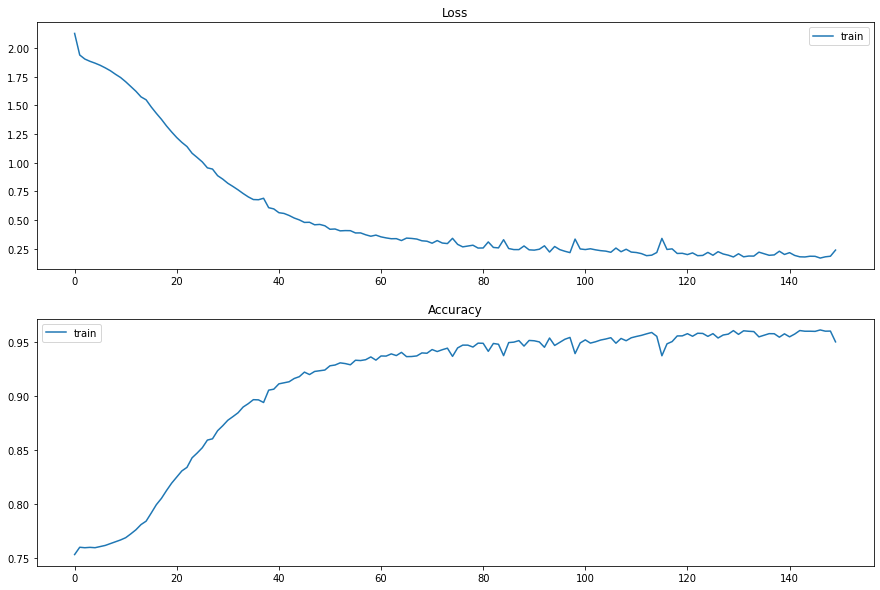

In [58]:
from matplotlib import pyplot
# plot loss during training
pyplot.figure(figsize=(15,10))
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.legend()
pyplot.show()

In [59]:
from keras.models import load_model
#training_model.save('GRU_model.h5')
#training_model = load_model('GRU_model.h5')

In [60]:
training_model.layers

In [61]:

encoder_inputs = training_model.input[0]
encoder_outputs, encoder_states = training_model.layers[2].output
encoder_model = Model(encoder_inputs, encoder_states)

latent_dim = dimensionality
decoder_states_inputs = Input(shape=(latent_dim,))
decoder_gru = training_model.layers[3]
decoder_inputs = training_model.input[1]
decoder_outputs, decoder_states = decoder_gru(decoder_inputs, initial_state=decoder_states_inputs)
decoder_dense= training_model.layers[4]
decoder_outputs = decoder_dense(decoder_outputs)
decoder_model = Model([decoder_inputs,decoder_states_inputs], [decoder_outputs,decoder_states])
 
def decode_response(test_input):
    #Getting the output states to pass into the decoder
    states_value = encoder_model.predict(test_input)
    #Generating empty target sequence of length 1
    target_seq = np.zeros((1, 1, num_decoder_tokens))
    #Setting the first token of target sequence with the start token
    target_seq[0, 0, target_features_dict['<START>']] = 1.
    
    #A variable to store our response word by word
    decoded_sentence = ''
    
    stop_condition = False
    while not stop_condition:
      #Predicting output tokens with probabilities and states
      output_tokens, states_value = decoder_model.predict([target_seq,states_value])
      #Choosing the one with highest probability
      sampled_token_index = np.argmax(output_tokens[0, -1, :])
      sampled_token = reverse_target_features_dict[sampled_token_index]
      # print(sampled_token)
      decoded_sentence += " " + sampled_token
      #Stop if hit max length or found the stop token
      if (sampled_token == '<END>' or len(decoded_sentence) > max_decoder_seq_length):
        stop_condition = True
      #Update the target sequence
      target_seq = np.zeros((1, 1, num_decoder_tokens))
      target_seq[0, 0, sampled_token_index] = 1.
    
    return decoded_sentence

In [62]:
def cleantext(usertext):
  usertext = removePunctuation(usertext)  
  usertext = removeEmojis(usertext) 
  usertext = deletedigits(usertext)
  tokens= tokenize(usertext, conditions=is_arabicrange)
  tokens = deleteduplication(tokens)
  usertext = ' '.join(tokens)
  
  T=list()
  tokens = tokenize(usertext, conditions=is_arabicrange)
  if len(tokens)>1:
      for tag in tokens:
          try:
              tag = strip_tashkeel(tag)
              tag = strip_tatweel(tag)
              tag = removeduplication(tag)                    
              # tag =stemming(tag)

              tag =tag.replace(u'لإ', u'لا')
              tag =tag.replace(u'لأ', u'لا')
              tag =tag.replace(u'لآ', u'لا')
              tag =tag.replace(u'ى', u'ي')
              tag = normalize_hamza(tag)
              tag =tag.replace(u'ٱ', u'ء')
              if tag.endswith(u'ه'):
                  tag =tag.replace(u'ه', u'ة')
              tag = removeduplication(tag)
              T.append(tag)
          except:
              pass
      usertext =' '.join(T)
  return usertext

In [63]:
class ChatBot:

  exit_commands = ("شكرا", "باي", "الى اللقاء")
#Method to start the conversation
  def start_chat(self):
    user_response = input("مرحبا أنا دزشات بوت تفضل بطرح سؤالك\n")
    user_response = cleantext(user_response)
    self.chat(user_response)
#Method to handle the conversation
  def chat(self, reply):
    while not self.make_exit(reply):
      reply = input(self.generate_response(reply)+"\n")
    
  #Method to convert user input into a matrix
  def string_to_matrix(self, user_input):
    tokens = re.findall(r"[\w']+|[^\s\w]", user_input)
    user_input_matrix = np.zeros(
      (1, max_encoder_seq_length, num_encoder_tokens),
      dtype='float32')
    for timestep, token in enumerate(tokens):
      if token in input_features_dict:
        user_input_matrix[0, timestep, input_features_dict[token]] = 1.
    return user_input_matrix
  
  #Method that will create a response using seq2seq model we built
  def generate_response(self, user_input):
    input_matrix = self.string_to_matrix(user_input)
    chatbot_response = decode_response(input_matrix)
    #Remove <START> and <END> tokens from chatbot_response
    chatbot_response = chatbot_response.replace("<START>",'')
    chatbot_response = chatbot_response.replace("<END>",'')
    return chatbot_response
#Method to check for exit commands
  def make_exit(self, reply):
    for exit_command in self.exit_commands:
      if exit_command in reply:
        print("أوكي, شكرا لتواصلكم معنا")
        return True
    return False
  
# chatbot = ChatBot()
# chatbot.start_chat()

#Performance Evaluation

In [64]:
class ChatBot_Evaluation:

  exit_commands = ("شكرا", "باي", "الى اللقاء")
#Method to start the conversation
  def start_chat(self,PC,NC,NI,PI,Cplt,AvgLenW,AvgLenC,DataX,DataY,TrainorTestY):
    print("1: PC = Correct response produced \n"+"2: NC = Unexpected response \n"+ "3: NI = Absence of response \n"+ "4: PI = Incorrect response produced \n")
    user_response = DataX[0]
    print("السؤال الأول: "+ user_response)
    print(" الاجابة الصحيحة: "+ DataY[0])
    user_response = cleantext(user_response)
    PC,NC,NI,PI,Cplt,AvgLenW,AvgLenC,P,R,F1Score,Accuracy = self.chat(user_response,PC,NC,NI,PI,Cplt,AvgLenW,AvgLenC,DataX,DataY,TrainorTestY)
    return PC,NC,NI,PI,Cplt,AvgLenW,AvgLenC,P,R,F1Score,Accuracy
#Method to handle the conversation
  def chat(self, reply,PC,NC,NI,PI,Cplt,AvgLenW,AvgLenC,DataX,DataY,TrainorTestY):
    for i in range(1,len(DataX)+1):
      responsedzchatbot = self.generate_response(reply)
      responsedzchatbot = responsedzchatbot.lstrip().rstrip()
      print(" جواب ديزادشاتبوت: "+ responsedzchatbot+"\n")
      #print("أرجو تقييم الجواب حسب الأرقام ادناه:  \n")
      #print("len(responsedzchatbot)= ",len(responsedzchatbot))
      if len(responsedzchatbot)==0:
        NI = NI + 1
        print("NI")
      else:
        #print("responsedzchatbot in DataY= ",responsedzchatbot in DataY)  
        if responsedzchatbot in DataY:
          x = np.where(DataY == responsedzchatbot)
          #print("len(x)= ",len(x))
          if len(x)>0:
            findit=False
            for j in x:
              if DataX[j[0]] == reply:
                findit=True
                AvgLenW.append(len(responsedzchatbot.split(' ')))
                AvgLenC.append(len(responsedzchatbot))
                Cplt = Cplt + 1
                PC = PC + 1
                print("Cplt")
                print("PC")
                break
            if findit==False:
              PI = PI + 1
              print("PI")
        elif responsedzchatbot not in DataY:
          #print("responsedzchatbot not in DataY= ",responsedzchatbot not in DataY)
          findit=False
          for z,itemA in enumerate(DataY):
            if responsedzchatbot in itemA:
              #print("responsedzchatbot  in itemA= ",responsedzchatbot in itemA)
              if reply in DataX[z]:
                findit=True
                AvgLenW.append(len(responsedzchatbot.split(' ')))
                AvgLenC.append(len(responsedzchatbot))
                PC = PC + 1
                print("PC")
                break
          if findit==False:
            #print("responsedzchatbot in TrainorTestY= ",responsedzchatbot in TrainorTestY)  
            if responsedzchatbot not in TrainorTestY:
              NC = NC + 1
              print("NC")
            elif responsedzchatbot  in TrainorTestY:
              PI = PI + 1
              print("PI")


      
      # feedback =int(input("Your Feedback please:  \n"))
      # if feedback ==1 :
      #   PC = PC + 1
      #   AvgLenW.append(len(responsedzchatbot.split(' ')))
      #   AvgLenC.append(len(responsedzchatbot))
      #   completres =int(input("Is the response complet:1 or not:0:  \n"))
      #   if completres ==1 :
      #     Cplt = Cplt + 1
      # elif feedback ==2 :
      #   NC = NC + 1
      # elif feedback ==3 :
      #   NI = NI + 1
      # elif feedback ==4 :
      #   PI = PI + 1
      if i <len(DataX):
        print("السؤال التالي: "+ DataX[i])
        print(" الاجابة الصحيحة: "+ DataY[i])
        reply = DataX[i]
        reply = cleantext(reply)
    
    P= PC/(PC+NC)
    R = PC/(PC+PI)
    F1Score = (2*P*R)/(P+R)
    Accuracy = (PC+NI)/(PC+NC+PI+NI)
    return PC,NC,NI,PI,Cplt,AvgLenW,AvgLenC,P,R,F1Score,Accuracy

  #Method to convert user input into a matrix
  def string_to_matrix(self, user_input):
    tokens = re.findall(r"[\w']+|[^\s\w]", user_input)
    user_input_matrix = np.zeros(
      (1, max_encoder_seq_length, num_encoder_tokens),
      dtype='float32')
    for timestep, token in enumerate(tokens):
      if token in input_features_dict:
        user_input_matrix[0, timestep, input_features_dict[token]] = 1.
    return user_input_matrix
  
  #Method that will create a response using seq2seq model we built
  def generate_response(self, user_input):
    input_matrix = self.string_to_matrix(user_input)
    chatbot_response = decode_response(input_matrix)
    #Remove <START> and <END> tokens from chatbot_response
    chatbot_response = chatbot_response.replace("<START>",'')
    chatbot_response = chatbot_response.replace("<END>",'')
    return chatbot_response
#Method to check for exit commands
  def make_exit(self, reply):
    for exit_command in self.exit_commands:
      if exit_command in reply:
        print("أوكي, شكرا لتواصلكم معنا")
        return True
    return False

##Evaluation on the Test Data

In [65]:
chatbot = ChatBot_Evaluation()
PC=0
NC=0
NI=0
PI=0
Cplt=0
AvgLenW=list()
AvgLenC=list()

PC,NC,NI,PI,Cplt,AvgLenW,AvgLenC,P,R,F1Score,Accuracy = chatbot.start_chat(PC,NC,NI,PI,Cplt,AvgLenW,AvgLenC,X_Test,Y_Test,Y_Train)
print("PC: ",PC)
print("NC: ",NC)
print("NI: ",NI)
print("PI: ",PI)
print("Cplt: ",Cplt)

avglenresW = sum(AvgLenW)/len(AvgLenW)
print("AvgLenW: ", round(avglenresW,2))
print("Min AvgLenW: ", min(AvgLenW))
print("Max AvgLenW: ", max(AvgLenW))

avglenresC= sum(AvgLenC)/len(AvgLenC)
print("AvgLenC: ", round(avglenresC,2))
print("Min AvgLenC: ", min(AvgLenC))
print("Max AvgLenC: ", max(AvgLenC))

print("Precision: ",round(P,2))
print("Recall: ",round(R,2))
print("F1-Score: ",round(F1Score,2))
print("Accuracy: ",round(Accuracy,2))

1: PC = Correct response produced 
2: NC = Unexpected response 
3: NI = Absence of response 
4: PI = Incorrect response produced 

السؤال الأول: هل التطعيم للطفال مليح
 الاجابة الصحيحة: التطعيم هو وقاية للرضع والأطفال من الأمراض المعدية
 جواب ديزادشاتبوت: توفر الوقاية الصحية للأطفال

PI
السؤال التالي: عندي المعدة توجعني وعندي الحريق
 الاجابة الصحيحة: القرحة المعدية الحل مراجعة الطبيب لوصف الدواء اللازم
 جواب ديزادشاتبوت: القرحة المعدية الحل مراجعة

PC
السؤال التالي: وش تقدر تسببلك الحمي المالطية
 الاجابة الصحيحة: عدوى بطانة القلب الداخلية التهاب الخصيتين
 جواب ديزادشاتبوت: ارتفاع درجة الحرارة التعرق

NC
السؤال التالي: كاين ءسباب ءخري ولا مكانش
 الاجابة الصحيحة: العادات الروتينية الخاطئة
 جواب ديزادشاتبوت: من خلال الدم أو المني

PI
السؤال التالي: ماهي الاعراض التي تشير الي احتمال وجود سرطان الثدي
 الاجابة الصحيحة: تغيّر حجم أو ملامح الثدي
 جواب ديزادشاتبوت: ظهور الورم في الثدي

PI
السؤال التالي: ولدي في عمرة واحد شهر شحال يحتاج ساعة للنوم
 الاجابة الصحيحة: من اثنين واحد إلى خمسة واحد سا

##Evaluation on the Train Data

In [66]:
chatbot = ChatBot_Evaluation()
PC=0
NC=0
NI=0
PI=0
Cplt=0
AvgLenW=list()
AvgLenC=list()

PC,NC,NI,PI,Cplt,AvgLenW,AvgLenC,P,R,F1Score,Accuracy = chatbot.start_chat(PC,NC,NI,PI,Cplt,AvgLenW,AvgLenC,X_Train,Y_Train,Y_Test)
print("PC: ",PC)
print("NC: ",NC)
print("NI: ",NI)
print("PI: ",PI)
print("Cplt: ",Cplt)
avglenresW = sum(AvgLenW)/len(AvgLenW)
print("AvgLenW: ", round(avglenresW,2))
print("Min AvgLenW: ", min(AvgLenW))
print("Max AvgLenW: ", max(AvgLenW))

avglenresC= sum(AvgLenC)/len(AvgLenC)
print("AvgLenC: ", round(avglenresC,2))
print("Min AvgLenC: ", min(AvgLenC))
print("Max AvgLenC: ", max(AvgLenC))

print("Precision: ",round(P,2))
print("Recall: ",round(R,2))
print("F1-Score: ",round(F1Score,2))
print("Accuracy: ",round(Accuracy,2))

1: PC = Correct response produced 
2: NC = Unexpected response 
3: NI = Absence of response 
4: PI = Incorrect response produced 

السؤال الأول: نقدر نحي ضرسين اثنين مع بعضاهم بدون ضرر
 الاجابة الصحيحة: لا من الاحسن تباعد بيناتهم على الأقل اسبوعين
 جواب ديزادشاتبوت: لا من الاحسن تباعد بيناتهم

PC
السؤال التالي: ما مدة العلاج بالطب الصيني
 الاجابة الصحيحة: متوسط حوالى خمسة أربعة دقيقة
 جواب ديزادشاتبوت: متوسط حوالى خمسة أربعة دقيقة

Cplt
PC
السؤال التالي: وشنهي هي الماكلة لي تقدر تفيدني بفيتامين د
 الاجابة الصحيحة: صفار البيض و السلمون
 جواب ديزادشاتبوت: صفار البيض و السلمون

Cplt
PC
السؤال التالي: هل يصاب الاطفال عند الولادة بالماء الابيض
 الاجابة الصحيحة: نادرًا ما يُصاب به الطفل عند الولادة بسبب الوراثة
 جواب ديزادشاتبوت: نادرًا ما يُصاب به الطفل

PC
السؤال التالي: نقدر نعيش بعد ما ينحيولي قراجمي
 الاجابة الصحيحة: نعم ليست عضو ضروري للحياة
 جواب ديزادشاتبوت: نعم ليست عضو ضروري للحياة

Cplt
PC
السؤال التالي: كي يكون عندي نقص في الفيتامين ب وش قادر يصرالي
 الاجابة الصحيحة: يصرالك اكتئا